In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['price'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


- 변수가 많기 때문에 주택가격과 상관계수가 0.3이상인 애들만 추려보자

In [227]:
cormat=df.corr()
columns=cormat.index[abs(cormat['price'])>=0.3]


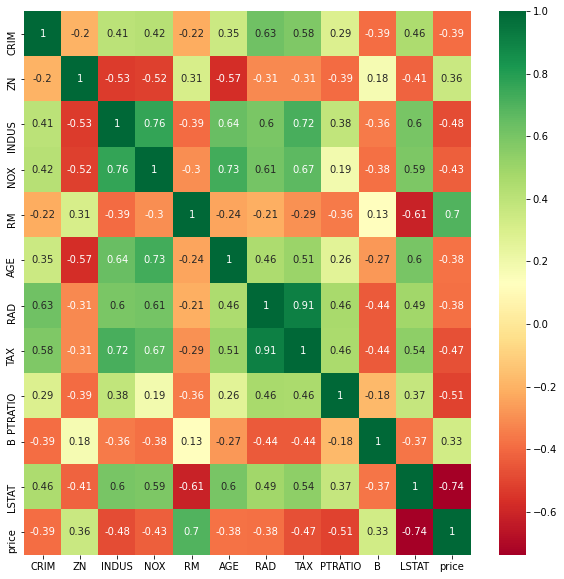

In [228]:
plt.figure(figsize=(10,10))
heat = sns.heatmap(df[columns].corr(), annot=True, cmap='RdYlGn')

- 우선적으로 price에 상관계수가 가장 큰 1개 만 뽑아서 단순선형회귀를 해보자

In [229]:
abs(cormat['price']).sort_values(ascending=True) # lstat, rm을 변수로 단순선형회귀 ㄱㄱ

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
price      1.000000
Name: price, dtype: float64

- lstat열 데이터 가공

In [230]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [231]:
df2 = df[['LSTAT','price']] # 표준화필요
df2

,LSTAT,price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


Text(0.5, 0, 'price')

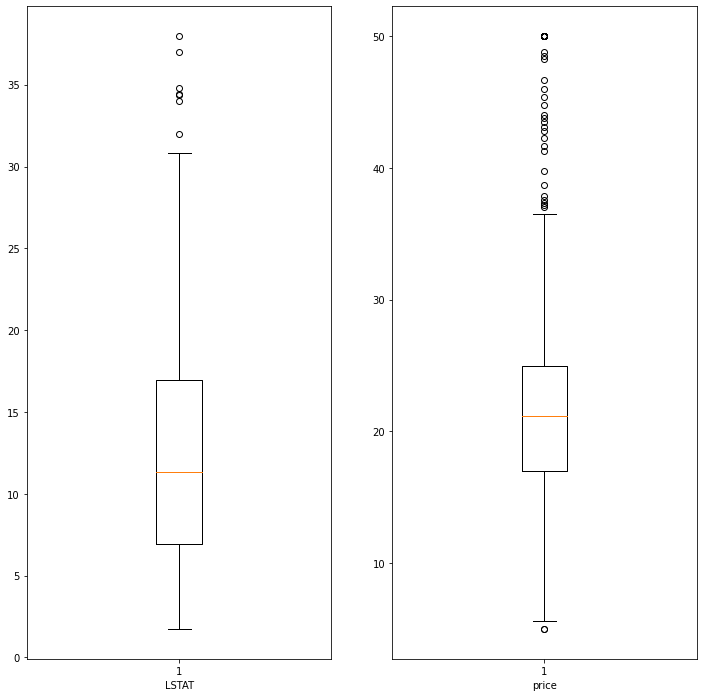

In [232]:
plt.figure(figsize=(12,12)) #이상치 최소화 해주는 robustscaler도 써보자
plt.subplot(121)
plt.boxplot(df2.LSTAT)
plt.xlabel('LSTAT')
plt.subplot(122)
plt.boxplot(df2.price)
plt.xlabel('price')



- train, test data set #우선적으로 RM 단순선형회귀

In [233]:
df2.LSTAT.values.reshape(-1,1)

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [234]:
X=df2.LSTAT.values.reshape(-1,1) ## 단순 변수 일때 data shape를 바꿔줘야함
y=df2.price

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state=2021, test_size=0.3
)

In [236]:
X_train.shape, X_test.shape

((354, 1), (152, 1))

- 표준화

In [237]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)


- 선형회귀 모델 ㄱㄱ

In [238]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_std, y_train)
lr.score(X_test_std, y_test) # ㅎㄷㄷ 정확도 개구림

0.484874518232815

- 정규화 해보자

In [239]:
from sklearn.preprocessing import MinMaxScaler
mms =   MinMaxScaler()
X_train_mms = mms.fit_transform(X_train)
X_test_mms = mms.fit_transform(X_test)

In [240]:
lr.fit(X_train_mms, y_train)
lr.score(X_test_mms, y_test) #ㅎㄷㄷ 더구림

0.4576600739003537

- 그렇다면 robust를 써보자

In [241]:
from sklearn.preprocessing import RobustScaler
rb =   RobustScaler()
X_train_rb = rb.fit_transform(X_train)
X_test_rb = rb.fit_transform(X_test)

In [242]:
lr.fit(X_train_rb, y_train)
lr.score(X_test_rb, y_test) #조금 높아 졌지만 그래도 구림

0.49721712344253755

In [243]:
lr.coef_, lr.intercept_

(array([-9.92589264]), 23.81586831694418)

- 실제, 예측값 산점도

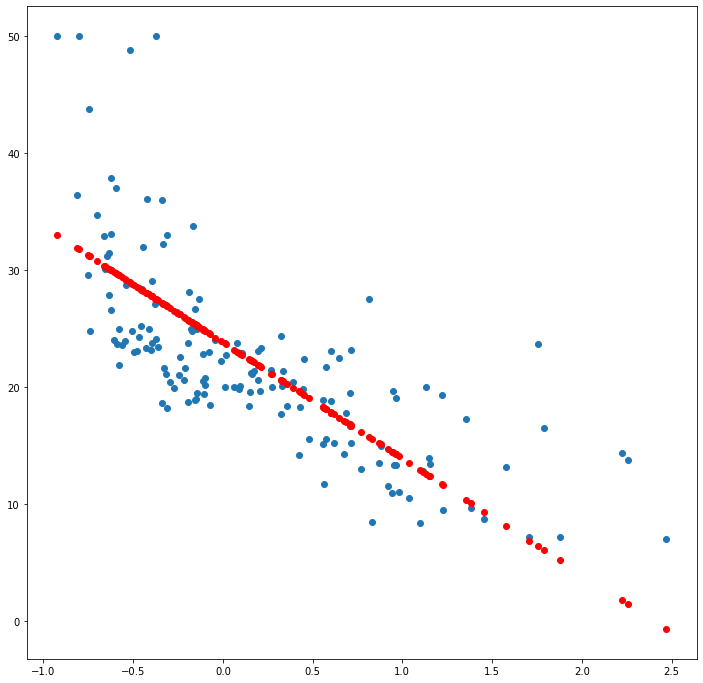

In [244]:
y_pred = lr.predict(X_test_rb)
plt.figure(figsize=(12,12))
plt.scatter(X_test_rb, y_test)
plt.scatter(X_test_rb, y_pred, c='r')
plt.show()

- 손실 얼마나되나 mse ㄱㄱ

In [245]:
from sklearn.metrics import mean_squared_error
y_pred_train = lr.predict(X_train_rb)
print(f'train data mse : {mean_squared_error(y_train, y_pred_train)}') # train data의 mse
print(f'test data mse : {mean_squared_error(y_test, y_pred)}') # test data의 mse

train data mse : 40.72364786844334
test data mse : 32.67775589935317


- 결정계수는 얼마나 되는가 ㄱㄱ

In [246]:
from sklearn.metrics import r2_score
r2 = r2_score(y_pred, y_test)
r2

0.3405953774958099

- 이제 X변수를 여러개로 설정 다중회귀 ㄱㄱ

In [247]:
X2 = df.iloc[:,:-1] # target값 뺴고 전부 x값으로
y2 = df.iloc[:,-1]

In [248]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2,y2,random_state=2021, test_size=0.3
)

- robust 스케일 적용

In [249]:
from sklearn.preprocessing import RobustScaler
rb2 = RobustScaler()
X2_train_rb = rb2.fit_transform(X2_train)
X2_test_rb = rb2.fit_transform(X2_test)

- 모델 돌려보자 ㄱㄱ

In [250]:
lr.fit(X2_train_rb, y2_train)
lr.score(X2_test_rb, y2_test) # 머이래 낮음 ㅎㄷㄷ

0.4387504817844471

- 회귀계수, 절편

In [251]:
lr.coef_, lr.intercept_

(array([-0.47866864,  0.61048131,  0.10924298,  3.21925464, -3.34503581,
         2.88184325,  0.6060292 , -4.59282178,  7.02912569, -4.52277765,
        -3.01161838,  0.2374505 , -5.74001113]),
 23.318053319892375)

- 손실 mse 얼마나 되나?

In [260]:
from sklearn.metrics import mean_squared_error
y2_pred_train = lr.predict(X2_train_rb)
y2_pred_test = lr.predict(X2_test_rb)
mean_y2_train = mean_squared_error(y2_train, y2_pred_train)
mean_y2_test = mean_squared_error(y2_test, y2_pred_test)
mean_y2_train, mean_y2_test # 높으면 안되는데,,

(22.468290164143323, 36.47772350652302)

- r2 square ㄱㄱ

In [261]:
from sklearn.metrics import r2_score
r2 = r2_score(y2_pred_test, y_test)
r2 # 요건 높아야 되는데 왜이럼?

0.38591271507661506

- 산점도 ㄱㄱ

In [254]:
np.argmax(df.columns == 'RM')

5

In [255]:
np.argwhere(df.columns == 'RM')

array([[5]], dtype=int64)

In [256]:
X2_test_rb[:,5]

array([-0.30136986, -0.35194942, -0.4685634 , -0.76923077,  1.84685634,
       -0.42641377,  0.34070952, -0.01756235, -0.15525114,  1.49139445,
        3.66069547,  0.5486477 , -0.55005269,  3.12399017,  1.66280295,
        0.25781524,  0.14682122, -0.03161222,  0.36459431,  0.85353003,
       -0.29012996, -0.11029153, -0.58658237,  1.27081138, -0.85634001,
        0.52054795, -0.26484018,  0.37021426,  0.42079382, -1.08254303,
       -0.54583772,  0.6399719 , -0.4460836 ,  0.28170004,  0.9827889 ,
       -0.7088163 ,  0.04847208,  0.34070952,  1.40990516, -0.40252898,
       -0.34632947,  0.45029856,  1.34949069,  1.41974008, -1.07130313,
       -0.15244117, -0.26624517,  1.09940288,  0.01053741,  0.43203372,
       -1.16684229,  2.98208641,  0.07235687,  1.16965227, -0.2395504 ,
       -0.41798384,  0.19318581,  0.09905163,  1.09097295, -0.45591851,
        2.31190727, -0.31682473,  0.28872497, -0.1032666 ,  0.55145767,
       -0.01053741, -0.07657183,  0.09202669, -0.44748858, -1.62

In [257]:
X2_test_rb.shape, y_test.shape

((152, 13), (152,))

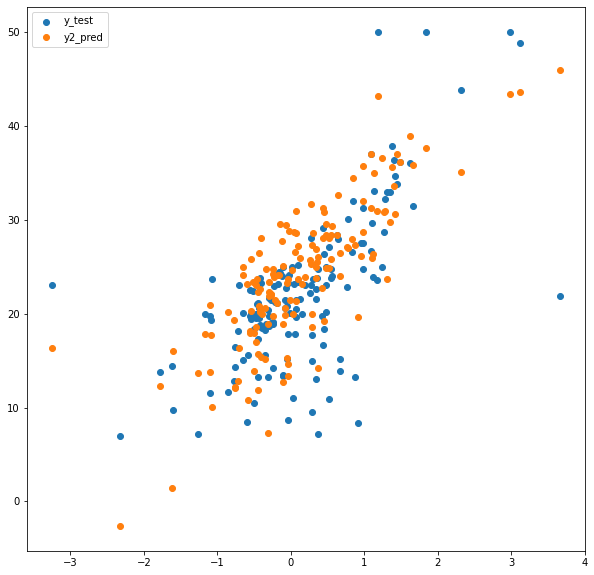

In [258]:
plt.figure(figsize=(10,10))
plt.scatter(X2_test_rb[:,5], y_test, label='y_test')
plt.scatter(X2_test_rb[:,5], y2_pred_test, label = 'y2_pred')
plt.legend()
plt.show()